<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Project_3_Lasso_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Team Members:

##### Joseph Mart (Project Lead)- A00732897

##### Callitus Obunadike - A00756855

Problem Statement

In this project, we shall walk through the data mining or machine learning procedure as
outlined by a general framework such as SEMMA (Sample-Explore-Modify-Model-Assess) via
a logistic regression example. Consider the BreastCancer dataset available from R package
mlbench. The dataset has n = 699 observations and 11 columns. The Class column is the
response (dependent) variable and it tells if a given tissue is malignant or benign. Thus we
have a binary classification problem.
Follow the steps below to conduct your analysis
1. You may obtain the data directly in R. If you want to conduct analysis with Python,
you may save the data to a CSV FILE and then bring it in Python.
install.packages("mlbench")
data(BreastCancer, package="mlbench")
dat <- BreastCancer; dim(dat); head(dat)
write.csv(dat, file="BreastCancer.csv", row.names =FALSE)

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Bring it in Python.

In [2]:
df = pd.read_csv('/content/Breast_Cancer.csv') 

In [ ]:
df.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,benign
1,1002945,5,4,4,5,7,10.0,3,2,1,benign
2,1015425,3,1,1,1,2,2.0,3,1,1,benign
3,1016277,6,8,8,1,3,4.0,3,7,1,benign
4,1017023,4,1,1,3,2,1.0,3,1,1,benign


In [ ]:
df.tail()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2.0,1,1,1,benign
695,841769,2,1,1,1,2,1.0,1,1,1,benign
696,888820,5,10,10,3,7,3.0,8,10,2,malignant
697,897471,4,8,6,4,3,4.0,10,6,1,malignant
698,897471,4,8,8,5,4,5.0,10,4,1,malignant


# 2. Prepare the data 

by inspecting the variable types, missing values, outlying and possibly
wrong records, and other issues. Perform some EDA (Exploratory Data Analysis). In
particular, inspect the frequency distribution of the target variable Class and see, e.g.,
whether we have a very unbalanced classification problem. Also, explore the associations
between Class and other attributes. Select a few interesting findings to present.

In [ ]:
# Checking for null values

df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [ ]:
# Visualize the NULL observations

df[df['Bare.nuclei'].isnull()]

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,malignant
40,1096800,6,6,6,9,6,NaN,7,8,1,benign
139,1183246,1,1,1,1,1,NaN,2,1,1,benign
145,1184840,1,1,3,1,2,NaN,2,1,1,benign
158,1193683,1,1,2,1,3,NaN,1,1,1,benign
164,1197510,5,1,1,1,2,NaN,3,1,1,benign
235,1241232,3,1,4,1,2,NaN,3,1,1,benign
249,169356,3,1,1,1,2,NaN,3,1,1,benign
275,432809,3,1,3,1,2,NaN,2,1,1,benign
292,563649,8,8,8,1,2,NaN,6,10,1,malignant


Column 'Bare.nuclei' has missing values,replace with the mean value sicne the missing values are not too much

In [ ]:
#FillNA in Bare.nuclei'

df['Bare.nuclei'].fillna(value=df['Bare.nuclei'].mean(), inplace=True)

In [ ]:
# Visualize the NULL observations
df.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

In [ ]:
# Investigate all the elements whithin each Feature 

for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 5:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Id is: 645
The number of values for feature Cl.thickness is: 10
The number of values for feature Cell.size is: 10
The number of values for feature Cell.shape is: 10
The number of values for feature Marg.adhesion is: 10
The number of values for feature Epith.c.size is: 10
The number of values for feature Bare.nuclei is: 11
The number of values for feature Bl.cromatin is: 10
The number of values for feature Normal.nucleoli is: 10
The number of values for feature Mitoses is: 9
The number of values for feature Class is: 2 -- ['benign' 'malignant']


<AxesSubplot:xlabel='Class', ylabel='count'>

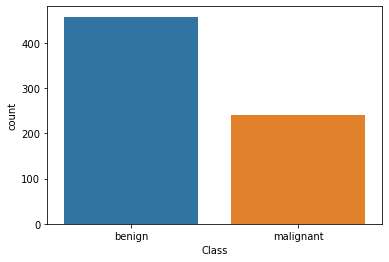

In [ ]:
#Response Balancesness :  frequency distribution

sns.countplot(data=df,x='Class')

The response is not balanced

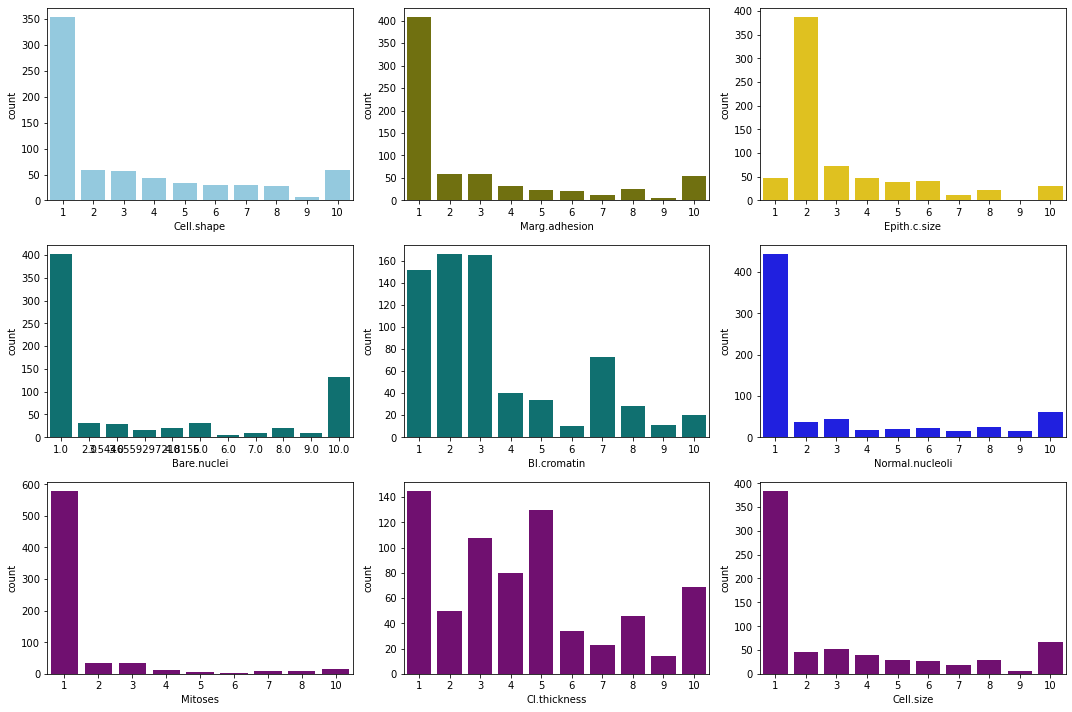

In [ ]:
### CountPlot Ditribution 

fig,axs = plt.subplots(3,3, figsize = (15,10))

sns.countplot(data=df, x="Cell.shape",  color="skyblue", ax=axs[0, 0])
sns.countplot(data=df, x="Marg.adhesion", color="olive", ax=axs[0, 1])
sns.countplot(data=df, x="Epith.c.size", color="gold", ax=axs[0, 2])
sns.countplot(data=df, x="Bare.nuclei",color="teal", ax=axs[1, 0])
sns.countplot(data=df, x="Bl.cromatin",color="teal", ax=axs[1, 1])
sns.countplot(data=df, x="Normal.nucleoli", color="blue", ax=axs[1, 2])
sns.countplot(data=df, x="Mitoses", color="purple", ax=axs[2,0])
sns.countplot(data=df, x="Cl.thickness", color="purple", ax=axs[2,1])
sns.countplot(data=df, x="Cell.size", color="purple", ax=axs[2,2])

fig.tight_layout()

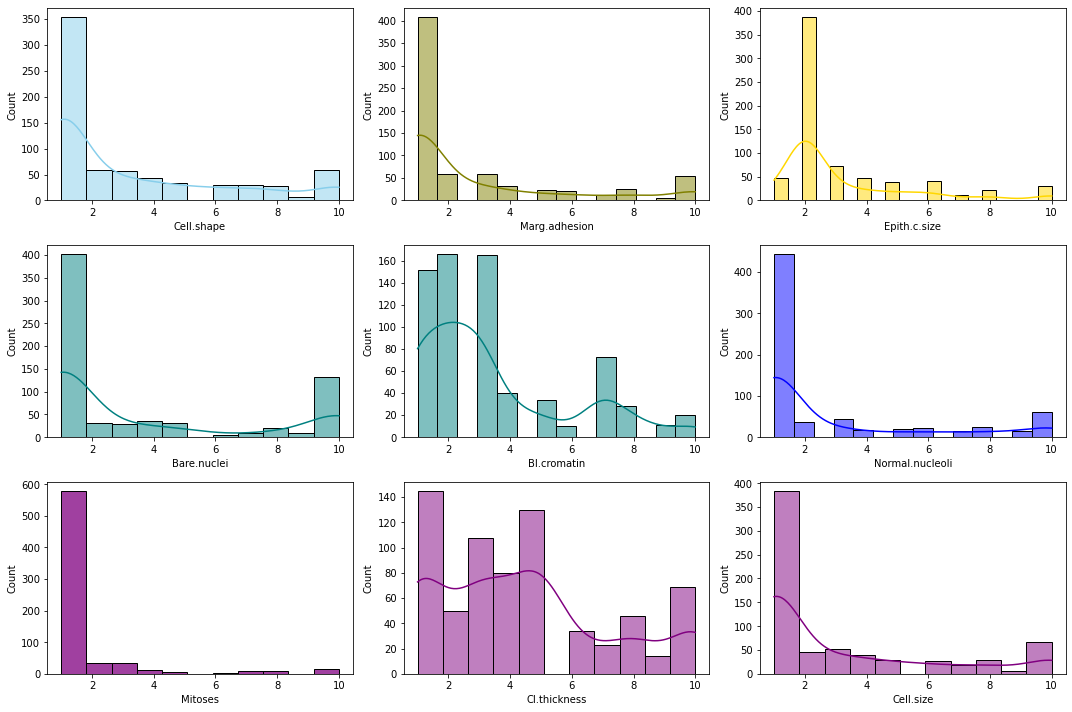

In [ ]:
### Histogram Distribution

fig,axs = plt.subplots(3,3, figsize = (15,10))

sns.histplot(data=df, x="Cell.shape",  kde= True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="Marg.adhesion", kde= True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Epith.c.size", kde= True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="Bare.nuclei",kde= True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="Bl.cromatin", kde= True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Normal.nucleoli", kde= True, color="blue", ax=axs[1, 2])
sns.histplot(data=df, x="Mitoses", color="purple", ax=axs[2,0])
sns.histplot(data=df, x="Cl.thickness", kde= True, color="purple", ax=axs[2,1])
sns.histplot(data=df, x="Cell.size", kde= True, color="purple", ax=axs[2,2])

fig.tight_layout()

The didtribution shown, we can tell that non of the variable have normal distribution
This will impact our model

#### Explore the associations between Class and other attributes.

In [ ]:
# Creating Scale Map
scale_mapper = {'malignant':1, 'benign':0}

# Map feature values to scale
df['Class'] = df['Class'].replace(scale_mapper)

In [ ]:
df['Class']

0      0
1      0
2      0
3      0
4      0
      ..
694    0
695    0
696    1
697    1
698    1
Name: Class, Length: 699, dtype: int64

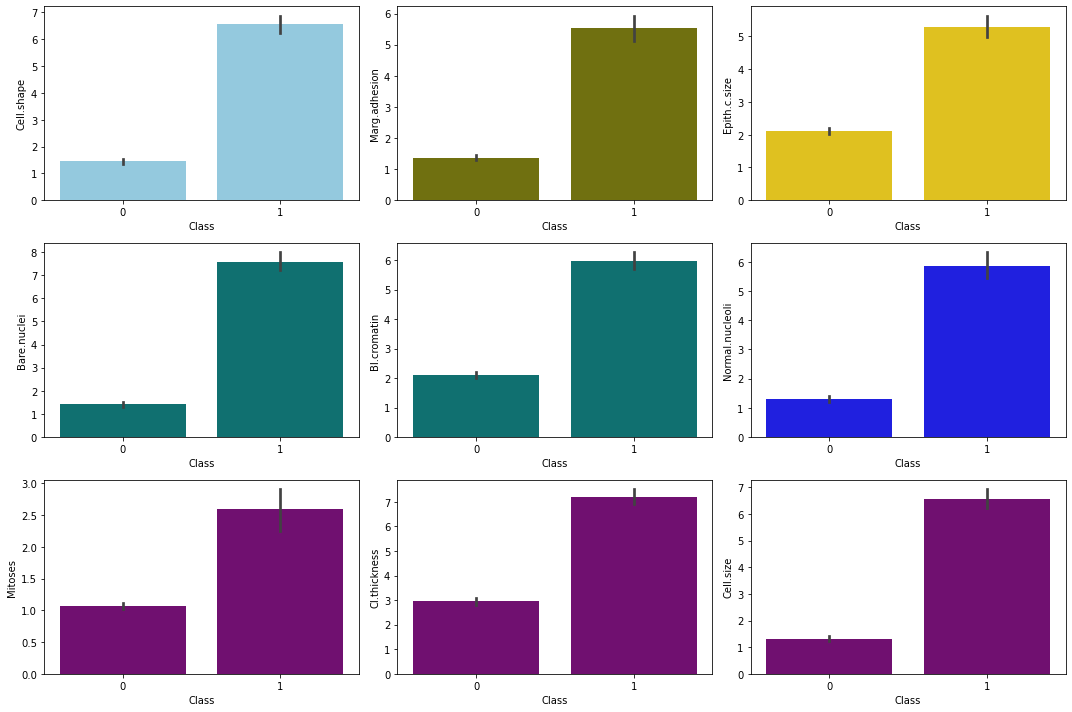

In [ ]:

fig,axs = plt.subplots(3,3, figsize = (15,10))

sns.barplot(data=df,x ='Class' ,y="Cell.shape",  color="skyblue", ax=axs[0, 0])
sns.barplot(data=df, x ='Class', y="Marg.adhesion", color="olive", ax=axs[0, 1])
sns.barplot(data=df, x ='Class', y="Epith.c.size", color="gold", ax=axs[0, 2])
sns.barplot(data=df, x ='Class', y="Bare.nuclei",color="teal", ax=axs[1, 0])
sns.barplot(data=df, x ='Class', y="Bl.cromatin",color="teal", ax=axs[1, 1])
sns.barplot(data=df, x ='Class', y="Normal.nucleoli", color="blue", ax=axs[1, 2])
sns.barplot(data=df, x ='Class', y="Mitoses", color="purple", ax=axs[2,0])
sns.barplot(data=df, x ='Class', y="Cl.thickness", color="purple", ax=axs[2,1])
sns.barplot(data=df, x ='Class', y="Cell.size", color="purple", ax=axs[2,2])

fig.tight_layout()

Those who are malignant in tend to have larger values for all the features(predictors)

This implies a direct proportion  between the size of each feature and the malignant category Class

This is the exact opposite of the benign

#### Investigating Multicolinearity 

In [ ]:
#Remove Target Variable

dfcor = df.drop(columns=['Class'])

In [ ]:
dfcor

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
0,1000025,5,1,1,1,2,1.0,3,1,1
1,1002945,5,4,4,5,7,10.0,3,2,1
2,1015425,3,1,1,1,2,2.0,3,1,1
3,1016277,6,8,8,1,3,4.0,3,7,1
4,1017023,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1
695,841769,2,1,1,1,2,1.0,1,1,1
696,888820,5,10,10,3,7,3.0,8,10,2
697,897471,4,8,6,4,3,4.0,10,6,1


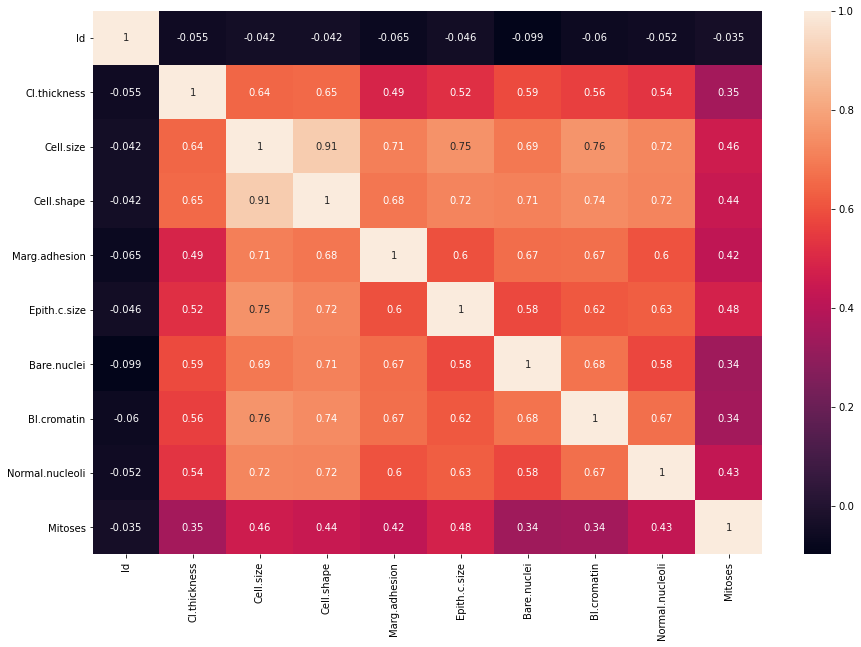

In [ ]:
#Correlation matrix
plt.figure(figsize=(15,10)) #Set figure size

sns.heatmap(dfcor.corr(), annot=True)

plt.show()

In [ ]:
correlatedColumns = []
corr = dfcor.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.8
negthreshold = -0.8

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            
if len(correlatedColumns) < 1: print('No Multicolinearity in dataset')

else: print(correlatedColumns)

[{'column': 'Cell.size', 'row': 'Cell.shape', 'val': 0.9068819130526037}, {'column': 'Cell.shape', 'row': 'Cell.size', 'val': 0.9068819130526037}]


Some of the features exhibit multicolinearity at a threshold of (0.8)

### 3. Partition the data into three parts, the training data D1, the validation data D2, and the test data D3, with a ratio of 2:1:1.

##### Standardize The Data

In [ ]:
df.columns

Index(['Id', 'Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses', 'Class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling our columns except the target
scale_vars = ['Id','Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
              'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli','Mitoses'
             ]

scaler = MinMaxScaler()
df[scale_vars] = scaler.fit_transform(df[scale_vars]) #df1[scale_vars] -> making the array  to a dataframe

df.head()


,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,0.070067,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,0
1,0.070285,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,0
2,0.071217,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,0
3,0.071281,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,0
4,0.071336,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,0


In [ ]:
X = df.drop('Class', axis = 1)

In [ ]:
y = df['Class']

In [ ]:

#Split the data into training and testing set using Hold-out validation Method

from sklearn.model_selection import train_test_split

# first one
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)

# Second one: It will be used after hyper-parameter tuning
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state=15)

### 4. We now build a logistic regression model for this medical diagnosis task.

##### (a) Fit the regularized logistic regression using the training data D1. While L1 regu-larization or LASSO is suggested here, you may use other penalty functions of your choice.

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

#Train the model
lassoReg = Lasso(alpha=0.1)
lassoReg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
#Predict
y_pred_lasso = lassoReg.predict(X_train)

In [ ]:
#Check Model Accuracy 
MAE = mean_absolute_error(y_pred_lasso, y_train)
print('Mean Absolute Error on Training Data is: ', (MAE)*100)

Mean Absolute Error on Training Data is:  34.39117696384226


In [ ]:
lassoReg.coef_

array([-0.        ,  0.        ,  0.03557763,  0.        ,  0.        ,
        0.        ,  0.3069985 ,  0.        ,  0.        ,  0.        ])

In [ ]:
#Putting togetehr coef and their corresponding colums
coeff_df = pd.DataFrame()
coeff_df["Colume_Name"] =  X_train.columns
coeff_df['Coefficient_Value'] = pd.Series(lassoReg.coef_)

print(coeff_df)

       Colume_Name  Coefficient_Value
0               Id          -0.000000
1     Cl.thickness           0.000000
2        Cell.size           0.035578
3       Cell.shape           0.000000
4    Marg.adhesion           0.000000
5     Epith.c.size           0.000000
6      Bare.nuclei           0.306999
7      Bl.cromatin           0.000000
8  Normal.nucleoli           0.000000
9          Mitoses           0.000000


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

#Train the model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
#Predict
y_pred_ridg = ridge.predict(X_train)

In [ ]:
MAE = mean_absolute_error(y_pred_ridg, y_train)
print('Mean Absolute Error on Training Data is: ', (MAE)*100)

Mean Absolute Error on Training Data is:  12.535067997206784


In [ ]:
ridge.coef_

array([-0.07884034,  0.27554066,  0.20992215,  0.16317294,  0.0918783 ,
        0.11741744,  0.3839127 ,  0.16326265,  0.15824341, -0.02116083])

In [ ]:
#Putting together coef and their corresponding colums
coeff_df = pd.DataFrame()
coeff_df["Colume_Name"] =  X_train.columns
coeff_df['Coefficient_Value'] = pd.Series(ridge.coef_)

print(coeff_df)

       Colume_Name  Coefficient_Value
0               Id          -0.078840
1     Cl.thickness           0.275541
2        Cell.size           0.209922
3       Cell.shape           0.163173
4    Marg.adhesion           0.091878
5     Epith.c.size           0.117417
6      Bare.nuclei           0.383913
7      Bl.cromatin           0.163263
8  Normal.nucleoli           0.158243
9          Mitoses          -0.021161


### Observation
Ridge seems to give the minimum MAE over Lasso without hyper-parameter tuning for thesam alpha value, Also Lasso is suggesting that all variables with zero coefficeints are not important, wheareas Rige is doing the opposite and with a better MAE value, hence we will need to tune the parameters for both models and see if Lasso and rdige perform better

Then we choose the best model

##### (b) Select the best tuning parameter using the validation data D2. Different criteria could be used here for the selection, such as the misclassification rate or the mean square error for the predicted probabilities.

We will use GrideSearchCv to select the best paramenter for both Ridge and Lasso and choose the best model

In [ ]:
########Lasso Hyper-Parameter Tuning with GrideSearchCv

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score,KFold

cv = KFold(n_splits=5, random_state=1)
lasso2 = Lasso()

r_parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]} # this is the Ridge regressor penalty, across different values

lasso2_regressor = GridSearchCV(lasso2, r_parameters, scoring = 'neg_mean_squared_error', cv = cv ,n_jobs=-1)

lasso2_regressor.fit(X_valid,y_valid)

lasso2_best_params_ = lasso2_regressor.best_params_
lasso2_best_score_ = -lasso2_regressor.best_score_

In [ ]:
print('Best Alpha is:', lasso2_best_params_)

Best Alpha is: {'alpha': 0.01}


In [ ]:
print('Best Score is:', (lasso2_best_score_)*100)

Best Score is: 6.315564668076172


In [ ]:
#Lasso Predict
y_pred_lasso2 = lasso2_regressor.predict(X_valid)

MAE = mean_absolute_error(y_pred_lasso2, y_valid)
print('Mean Absolute Error on Validation Data is: ', (MAE)*100,'%')

Mean Absolute Error on Validation Data is:  14.081056933990507 %


We now have the best alpha parameters for Lasso that gave best MAE value of approximately 14 

#### (c) Present your final `best' model fit by pooling D1 and D2 together. Which variables are important predictors?

# Lasso

In [ ]:
#Final Model Lasso on D1
finalLassoD1 = Lasso(alpha=0.01)
finalLassoD1.fit(X_train, y_train)

#Predict
y_pred_finalLassoD1 = finalLassoD1.predict(X_train)

MAE = mean_absolute_error(y_pred_finalLassoD1, y_train)
print('Mean Absolute Error on Train Data D1 is: ', (MAE)*100)

Mean Absolute Error on Train Data D1 is:  13.005771999847513


In [ ]:
finalLassoD1.coef_

array([-0.        ,  0.22096577,  0.31928425,  0.13406709,  0.04264144,
        0.        ,  0.42319967,  0.04258051,  0.14856999,  0.        ])

In [ ]:
#Putting together coef and their corresponding colums
coeff_dff = pd.DataFrame()
coeff_dff["Colume_Name"] =  X_train.columns
coeff_dff['Coefficient_Value'] = pd.Series(finalLassoD1.coef_)

print(coeff_dff)

       Colume_Name  Coefficient_Value
0               Id          -0.000000
1     Cl.thickness           0.220966
2        Cell.size           0.319284
3       Cell.shape           0.134067
4    Marg.adhesion           0.042641
5     Epith.c.size           0.000000
6      Bare.nuclei           0.423200
7      Bl.cromatin           0.042581
8  Normal.nucleoli           0.148570
9          Mitoses           0.000000


Mean Absolute Error on Training Data using Final Lasso Model of alpha=0.01 is  is: 13.005771999847513

Which is better than the initial Lasso with alpha = 0.1 (with MAE= 34.39117696384226)

In [ ]:
#Final Model Lasso on D2

finalLassoD2 = Lasso(alpha=0.01)
finalLassoD2.fit(X_valid, y_valid)

#Predict
y_pred_finalLassoD2 = finalLassoD2.predict(X_valid)

MAE = mean_absolute_error(y_pred_finalLassoD2, y_valid)
print('Mean Absolute Error on Validation Data D2 is: ', (MAE)*100)

Mean Absolute Error on Validation Data D2 is:  14.081056933990507


In [ ]:
finalLassoD2.coef_

array([0.        , 0.30020525, 0.32914743, 0.25117764, 0.08716522,
       0.        , 0.27741341, 0.01216739, 0.        , 0.        ])

In [ ]:
#Putting together coef and their corresponding colums
coeff_dfff = pd.DataFrame()
coeff_dfff["Colume_Name"] =  X_valid.columns
coeff_dfff['Coefficient_Value'] = pd.Series(finalLassoD2.coef_)

print(coeff_dfff)

       Colume_Name  Coefficient_Value
0               Id           0.000000
1     Cl.thickness           0.300205
2        Cell.size           0.329147
3       Cell.shape           0.251178
4    Marg.adhesion           0.087165
5     Epith.c.size           0.000000
6      Bare.nuclei           0.277413
7      Bl.cromatin           0.012167
8  Normal.nucleoli           0.000000
9          Mitoses           0.000000


##### Feature Importance

As seen above, using D1-Train data, Id :-0.000000, and Mitoses :0.000000 have coefficeint values of zero indicating that they are not important to the Lasso model

However, using the D2 Validation data, Id, Epith.c.size, Normal.nucleoli and Mitoses are not important to the model

#### 5. Apply the final logistic model to the test data D3. Present the ROC curve and the area under the curve, i.e., the C-index.

In [ ]:
#Final Model Logistic-Lasso on D3

finalLassoD3 = Lasso(alpha=0.01)
finalLassoD3.fit(X_test, y_test)

#Predict
y_pred_finalLassoD3 = finalLassoD3.predict(X_test)

MAE = mean_absolute_error(y_pred_finalLassoD3, y_test)
print('Mean Absolute Error on Validation Data D2 is: ', (MAE)*100)

Mean Absolute Error on Validation Data D2 is:  12.170770082218857


In [ ]:
#Putting together coef and their corresponding colums
coeff_dffff = pd.DataFrame()
coeff_dffff["Colume_Name"] =  X_test.columns
coeff_dffff['Coefficient_Value'] = pd.Series(finalLassoD2.coef_)

print(coeff_dffff)

       Colume_Name  Coefficient_Value
0               Id           0.000000
1     Cl.thickness           0.300205
2        Cell.size           0.329147
3       Cell.shape           0.251178
4    Marg.adhesion           0.087165
5     Epith.c.size           0.000000
6      Bare.nuclei           0.277413
7      Bl.cromatin           0.012167
8  Normal.nucleoli           0.000000
9          Mitoses           0.000000


This gave the best of all our models with MAE of 12.170770082218857, best value so far

##### ROC CURVE

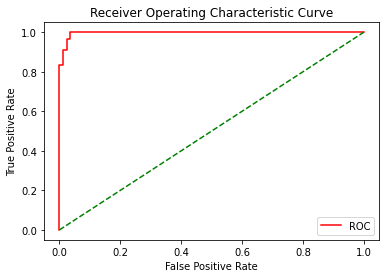

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    

from sklearn.metrics import roc_curve

fper, tper, thresholds = roc_curve(y_test, y_pred_finalLassoD3)
plot_roc_curve(fper, tper)